In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px
import seaborn as sns
from pandas import pivot_table
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# Ładowanie zmiennych środowiskowych
load_dotenv()

db_host = os.getenv("DB_HOST")
db_port = os.getenv("DB_PORT")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_database = os.getenv("DB_DATABASE")

conn = (
    f"mssql+pyodbc://{db_user}:{db_password}@{db_host}:{db_port}/{db_database}"
    "?driver=ODBC+Driver+17+for+SQL+Server"
)
engine = create_engine(conn)
print("Connection successful!")

Connection successful!


# Srednia temperatura od 1999 do 2024 z podziałem na miesiące

In [15]:
# Mean temperature between 2000 and 2018
meantemp_by_year_by_month = """
SELECT
    YEAR(d.data) AS Year,
    MONTH(d.data) AS Month,
    AVG(TemperaturaPowietrza) AS AvgTemp
FROM
    Depesze d
GROUP BY
    YEAR(d.data),MONTH(d.data)
order by Year, Month
"""

In [99]:
# Pobranie danych
df = pd.read_sql_query(meantemp_by_year_by_month, engine)

# Sprawdzenie i raportowanie zduplikowanych oraz brakujących wartości
print("Liczba zduplikowanych wierszy:", df.duplicated().sum())
print("Liczba brakujących wartości:", df.isnull().sum().sum())

# Obsługa duplikatów
df = df.drop_duplicates()

# Obsługa brakujących wartości, jeśli istnieją. W tym miejscu usuwamy wiersze z brakującymi wartościami, ale można je również wypełnić.
df = df.dropna()  # Można użyć innej metody, np. df.fillna(method='ffill', inplace=True)

# Informacja po czyszczeniu danych
print("Kształt danych po czyszczeniu:", df.shape)

# Tworzenie wykresu
fig = px.line(df, x='Month', y='AvgTemp', color='Year',
              title='Średnia temperatura miesięczna w ciągu lat',
              labels={
                  'Month': 'Miesiąc',
                  'AvgTemp': 'Średnia temperatura (°C)',
                  'Year': 'Rok'
              })

# Poprawa czytelności wykresu i wycentrowanie tytułu
fig.update_layout(title_x=0.5,
                  xaxis=dict(tickmode='array', tickvals=list(range(1, 13))),
                  xaxis_title='Miesiąc',
                  yaxis_title='Średnia temperatura (°C)')

# Wyświetlenie wykresu
fig.show()

Liczba zduplikowanych wierszy: 0
Liczba brakujących wartości: 0
Kształt danych po czyszczeniu: (303, 3)


In [101]:
df_wczesne_lata=df[df['Year']<2005]

fig = px.line(df_wczesne_lata, x='Month', y='AvgTemp', color='Year',
              title='Średnia temperatura miesięczna w ciągu lat',
              labels={
                  'Month': 'Miesiąc',
                  'AvgTemp': 'Średnia temperatura (°C)',
                  'Year': 'Rok'
              })

# Poprawa czytelności wykresu i wycentrowanie tytułu
fig.update_layout(title_x=0.5,
                  xaxis=dict(tickmode='array', tickvals=list(range(1, 13))),
                  xaxis_title='Miesiąc',
                  yaxis_title='Średnia temperatura (°C)')

# Wyświetlenie wykresu
fig.show()

In [105]:
df_wczesne_lata_2=df[(df['Year']>=2005) & (df['Year']<2010)]

fig = px.line(df_wczesne_lata_2, x='Month', y='AvgTemp', color='Year',
              title='Średnia temperatura miesięczna w ciągu lat',
              labels={
                  'Month': 'Miesiąc',
                  'AvgTemp': 'Średnia temperatura (°C)',
                  'Year': 'Rok'
              })

# Poprawa czytelności wykresu i wycentrowanie tytułu
fig.update_layout(title_x=0.5,
                  xaxis=dict(tickmode='array', tickvals=list(range(1, 13))),
                  xaxis_title='Miesiąc',
                  yaxis_title='Średnia temperatura (°C)')

# Wyświetlenie wykresu
fig.show()

In [106]:
df_wczesne_lata_3=df[(df['Year']>=2010) & (df['Year']<2015)]

fig = px.line(df_wczesne_lata_3, x='Month', y='AvgTemp', color='Year',
              title='Średnia temperatura miesięczna w ciągu lat',
              labels={
                  'Month': 'Miesiąc',
                  'AvgTemp': 'Średnia temperatura (°C)',
                  'Year': 'Rok'
              })

# Poprawa czytelności wykresu i wycentrowanie tytułu
fig.update_layout(title_x=0.5,
                  xaxis=dict(tickmode='array', tickvals=list(range(1, 13))),
                  xaxis_title='Miesiąc',
                  yaxis_title='Średnia temperatura (°C)')

# Wyświetlenie wykresu
fig.show()

# Porównanie mediany ze średnią temperatury z podziałem na rok i miesiące

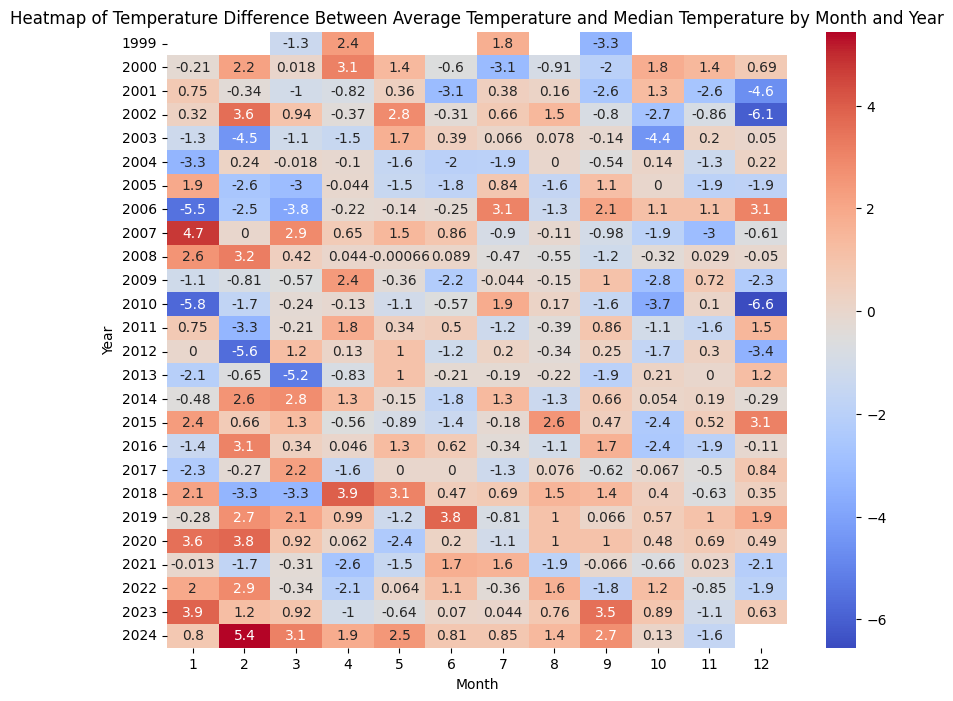

In [98]:
median_temps_by_month = df.groupby('Month')["AvgTemp"].median().reset_index().rename(columns={"AvgTemp": "MedianTemp"})
merged_df = pd.merge(df, median_temps_by_month, on='Month')
merged_df['TempDiff'] = merged_df['AvgTemp'] - merged_df['MedianTemp']
pivot_tab = merged_df.pivot(index="Year", columns="Month",values="TempDiff")
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_tab, annot=True, cmap="coolwarm")
plt.title("Heatmap of Temperature Difference Between Average Temperature and Median Temperature by Month and Year")
plt.show()

In [110]:
merged_df_positive = merged_df[merged_df['TempDiff'] > 0]
merged_df_positive.groupby('Year').size().reset_index(name='Count')

,Year,Count
0,1999,2
1,2000,7
2,2001,5
3,2002,6
4,2003,6
5,2004,3
6,2005,3
7,2006,5
8,2007,5
9,2008,6


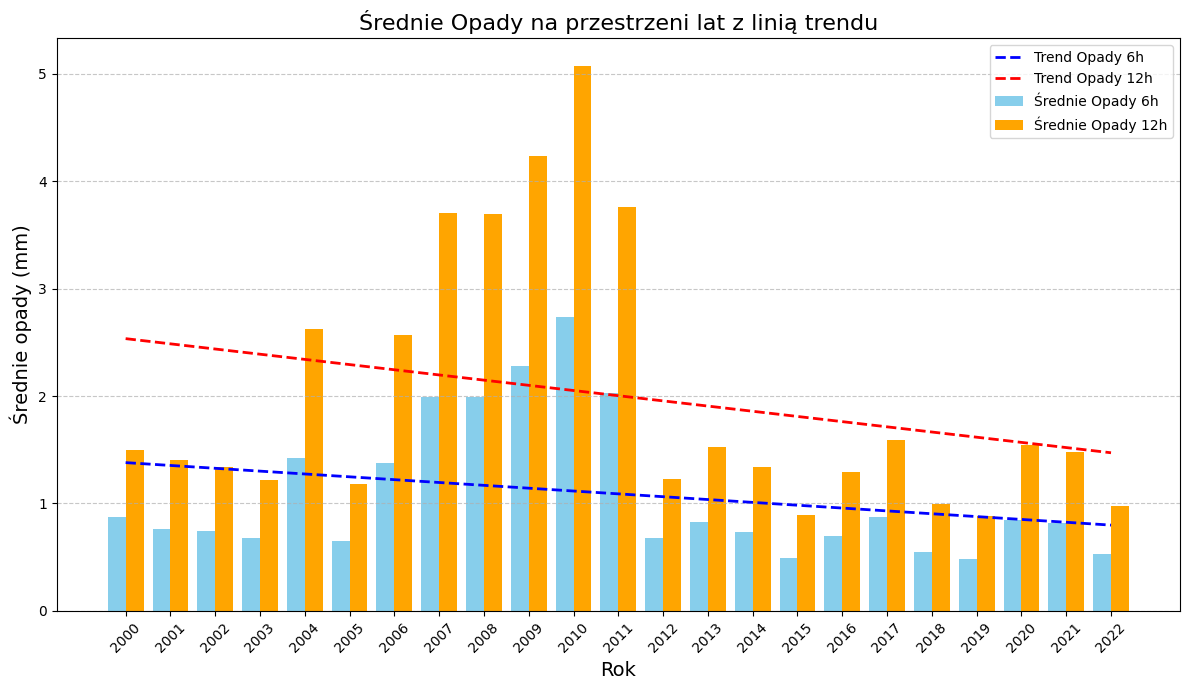

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine

# Pobranie danych z bazy (zapytanie SQL do analizy opadów)
query = """
SELECT
    YEAR(data) AS Rok,
    AVG(Opady6) AS SrednieOpady6h,
    AVG(Opady12) AS SrednieOpady12h
FROM
    Synop.dbo.DaneModelTMP
WHERE
    Opady6 IS NOT NULL AND Opady12 IS NOT NULL
GROUP BY
    YEAR(data)
ORDER BY
    Rok
"""
df = pd.read_sql(query, engine)

# Wyciągnięcie danych do regresji
x = df['Rok']
y6 = df['SrednieOpady6h']
y12 = df['SrednieOpady12h']

# Obliczanie współczynników regresji dla opadów 6-godzinnych
coeff6 = np.polyfit(x, y6, 1)  # Dopasowanie liniowe
trend6 = np.polyval(coeff6, x)  # Wyliczenie wartości linii trendu

# Obliczanie współczynników regresji dla opadów 12-godzinnych
coeff12 = np.polyfit(x, y12, 1)  # Dopasowanie liniowe
trend12 = np.polyval(coeff12, x)  # Wyliczenie wartości linii trendu

# Tworzenie wykresu słupkowego
plt.figure(figsize=(12, 7))
bar_width = 0.4
plt.bar(x - bar_width / 2, y6, width=bar_width, label='Średnie Opady 6h', color='skyblue')
plt.bar(x + bar_width / 2, y12, width=bar_width, label='Średnie Opady 12h', color='orange')

# Dodanie linii trendu
plt.plot(x, trend6, color='blue', linestyle='--', linewidth=2, label='Trend Opady 6h')
plt.plot(x, trend12, color='red', linestyle='--', linewidth=2, label='Trend Opady 12h')

# Dodanie etykiet i tytułu
plt.title('Średnie Opady na przestrzeni lat z linią trendu', fontsize=16)
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Średnie opady (mm)', fontsize=14)
plt.xticks(x, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

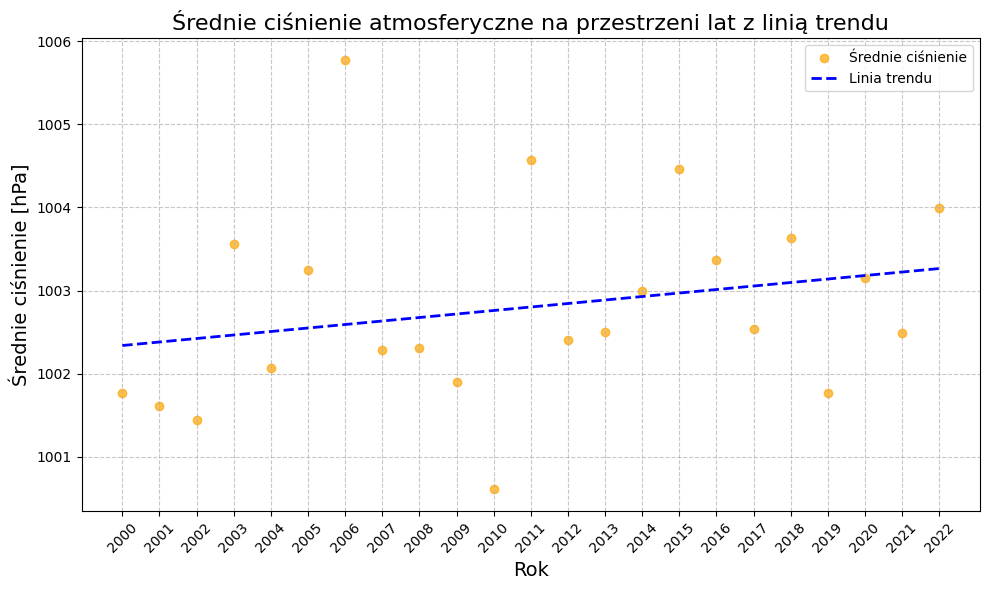

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine

# Pobranie danych z bazy (zapytanie SQL do analizy ciśnienia)
query = """
SELECT
    YEAR(data) AS Rok,
    AVG(CisnienieNaPoziomieStacji) AS SrednieCisnienie
FROM
    Synop.dbo.DaneModelTMP
WHERE
    CisnienieNaPoziomieStacji IS NOT NULL
GROUP BY
    YEAR(data)
ORDER BY
    Rok
"""
df = pd.read_sql(query, engine)

# Wyciągnięcie danych do regresji
x = df['Rok']
y = df['SrednieCisnienie']

# Obliczanie współczynników regresji (linia trendu)
coeff = np.polyfit(x, y, 1)  # Dopasowanie liniowe
trend = np.polyval(coeff, x)  # Wyliczenie wartości linii trendu

# Tworzenie wykresu punktowego
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='orange', label='Średnie ciśnienie', alpha=0.7)

# Dodanie linii trendu
plt.plot(x, trend, color='blue', linestyle='--', linewidth=2, label='Linia trendu')

# Dodanie etykiet i tytułu
plt.title('Średnie ciśnienie atmosferyczne na przestrzeni lat z linią trendu', fontsize=16)
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Średnie ciśnienie [hPa]', fontsize=14)
plt.xticks(x, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()


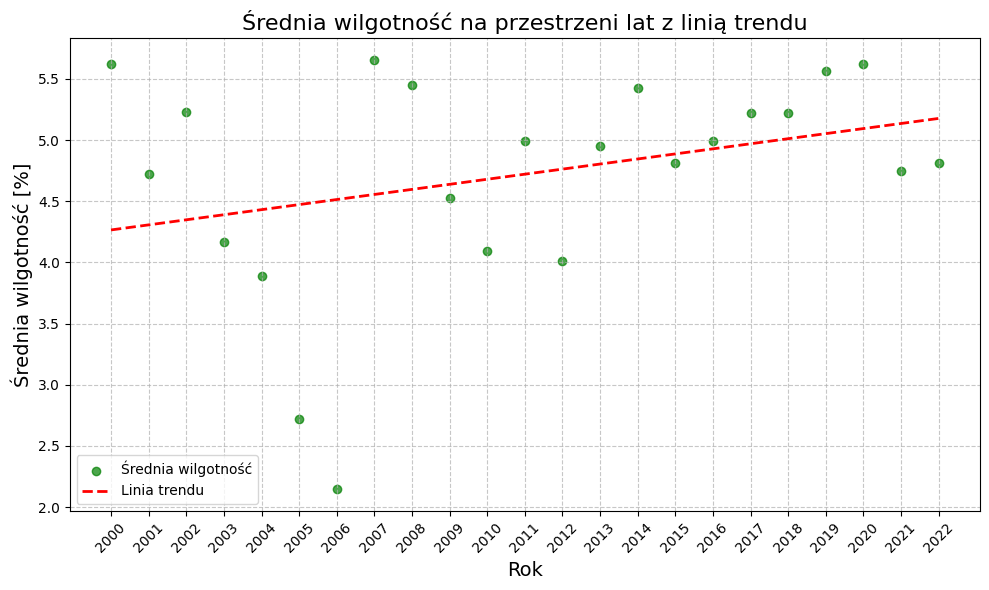

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine


# Pobranie danych z bazy (zapytanie SQL do analizy wilgotności)
query = """
SELECT
    YEAR(data) AS Rok,
    AVG(TemperaturaPunktuRosy) AS SredniaWilgotnosc
FROM
    Synop.dbo.DaneModelTMP
WHERE
    TemperaturaPunktuRosy IS NOT NULL
GROUP BY
    YEAR(data)
ORDER BY
    Rok
"""
df = pd.read_sql(query, engine)

# Wyciągnięcie danych do regresji
x = df['Rok']
y = df['SredniaWilgotnosc']

# Obliczanie współczynników regresji (linia trendu)
coeff = np.polyfit(x, y, 1)  # Dopasowanie liniowe
trend = np.polyval(coeff, x)  # Wyliczenie wartości linii trendu

# Tworzenie wykresu punktowego
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='green', label='Średnia wilgotność', alpha=0.7)

# Dodanie linii trendu
plt.plot(x, trend, color='red', linestyle='--', linewidth=2, label='Linia trendu')

# Dodanie etykiet i tytułu
plt.title('Średnia wilgotność na przestrzeni lat z linią trendu', fontsize=16)
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Średnia wilgotność [%]', fontsize=14)
plt.xticks(x, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()

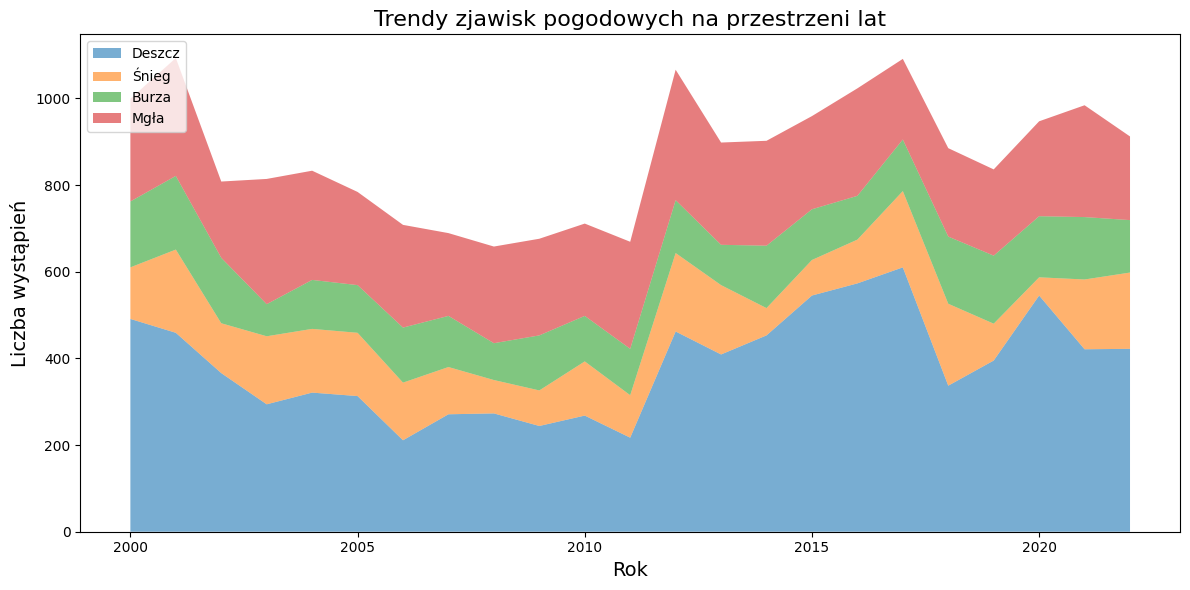

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Zapytanie SQL do analizy częstotliwości występowania zjawisk pogodowych
query = """
SELECT
    YEAR(data) AS Rok,
    SUM(CASE WHEN Deszcz6 = 1 THEN 1 ELSE 0 END) AS LiczbaDeszczy,
    SUM(CASE WHEN Snieg6 = 1 THEN 1 ELSE 0 END) AS LiczbaSniegów,
    SUM(CASE WHEN Burza6 = 1 THEN 1 ELSE 0 END) AS LiczbaBurz,
    SUM(CASE WHEN Mgla6 = 1 THEN 1 ELSE 0 END) AS LiczbaMgli
FROM
    Synop.dbo.DaneModelTMP
WHERE
    Deszcz6 IS NOT NULL OR Snieg6 IS NOT NULL OR Burza6 IS NOT NULL OR Mgla6 IS NOT NULL
GROUP BY
    YEAR(data)
ORDER BY
    Rok
"""
df = pd.read_sql(query, engine)

# Wykres powierzchniowy dla zjawisk pogodowych
plt.figure(figsize=(12, 6))

plt.stackplot(df['Rok'], df['LiczbaDeszczy'], df['LiczbaSniegów'], df['LiczbaBurz'], df['LiczbaMgli'],
              labels=['Deszcz', 'Śnieg', 'Burza', 'Mgła'], alpha=0.6)
plt.title('Trendy zjawisk pogodowych na przestrzeni lat', fontsize=16)
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Liczba wystąpień', fontsize=14)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()